The objective was to generalize the gender disparity in computer-related majors relative to all majors

<h1>Importing Necessary Tools</h1>
<p>The datascience package was used for reading .csv files and creating tables holding those values</p>
<p>Numpy was included for array manipulation and basic operations</p>

In [54]:
from datascience import *
import numpy as np
import pandas as pd
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy.stats.stats import pearsonr

<h1> Reading CSV Data</h1>
<p>The 'majors_population.csv' file shows data, notably, on population of majors by gender.</p>

In [4]:
major_data=Table.read_table('majors_population.csv')
major_data

Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000
6,2405,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,0.341631,65000
7,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,832,960,0.535714,62000
8,2414,MECHANICAL ENGINEERING,Engineering,91227,80320,10907,0.119559,60000
9,2401,AEROSPACE ENGINEERING,Engineering,15058,12953,2105,0.139793,60000
10,2408,ELECTRICAL ENGINEERING,Engineering,81527,65511,16016,0.19645,60000


<p>I added 'ShareMen' to complement 'ShareWomen'</p>

In [5]:
major_data=major_data.with_column('ShareMen',major_data.column('Men')/major_data.column('Total'))
major_data

Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median,ShareMen
1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000,0.879436
2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000,0.898148
3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000,0.846963
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000,0.892687
5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000,0.855033
6,2405,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,0.341631,65000,0.658369
7,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,832,960,0.535714,62000,0.464286
8,2414,MECHANICAL ENGINEERING,Engineering,91227,80320,10907,0.119559,60000,0.880441
9,2401,AEROSPACE ENGINEERING,Engineering,15058,12953,2105,0.139793,60000,0.860207
10,2408,ELECTRICAL ENGINEERING,Engineering,81527,65511,16016,0.19645,60000,0.80355


I extracted the list of majors just for reference in 'major_list', as shown below

In [6]:
major_list=np.unique(major_data.column('Major'))
major_list

array(['AEROSPACE ENGINEERING', 'APPLIED MATHEMATICS',
       'ARCHITECTURAL ENGINEERING', 'ARCHITECTURE',
       'ASTRONOMY AND ASTROPHYSICS',
       'ATMOSPHERIC SCIENCES AND METEOROLOGY', 'BIOCHEMICAL SCIENCES',
       'BIOLOGICAL ENGINEERING', 'BIOLOGY', 'BIOMEDICAL ENGINEERING',
       'BOTANY', 'CHEMICAL ENGINEERING', 'CHEMISTRY', 'CIVIL ENGINEERING',
       'COGNITIVE SCIENCE AND BIOPSYCHOLOGY',
       'COMMUNICATION DISORDERS SCIENCES AND SERVICES',
       'COMMUNICATION TECHNOLOGIES', 'COMMUNITY AND PUBLIC HEALTH',
       'COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY',
       'COMPUTER AND INFORMATION SYSTEMS', 'COMPUTER ENGINEERING',
       'COMPUTER NETWORKING AND TELECOMMUNICATIONS',
       'COMPUTER PROGRAMMING AND DATA PROCESSING', 'COMPUTER SCIENCE',
       'ECOLOGY', 'ELECTRICAL ENGINEERING',
       'ELECTRICAL ENGINEERING TECHNOLOGY',
       'ENGINEERING AND INDUSTRIAL MANAGEMENT',
       'ENGINEERING MECHANICS PHYSICS AND SCIENCE',
       'ENGINEERING TECHNOLOGIES'

<h1>Data Selection</h1>
<p>I selected for the majors that have the keyword "COMPUTER" in their titles to select only for majors related to computer science</p>

In [7]:
cs_major_data=major_data.where('Major',are.containing("COMPUTER"))
cs_major_data

Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median,ShareMen
11,2407,COMPUTER ENGINEERING,Engineering,41542,33258,8284,0.199413,60000,0.800587
19,2102,COMPUTER SCIENCE,Computers & Mathematics,128319,99743,28576,0.222695,53000,0.777305
31,2100,COMPUTER AND INFORMATION SYSTEMS,Computers & Mathematics,36698,27392,9306,0.253583,45000,0.746417
40,4005,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,609,500,109,0.178982,42000,0.821018
42,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,4168,3046,1122,0.269194,41300,0.730806
53,2106,COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY,Computers & Mathematics,8066,6607,1459,0.180883,37500,0.819117
56,2107,COMPUTER NETWORKING AND TELECOMMUNICATIONS,Computers & Mathematics,7613,5291,2322,0.305005,36400,0.694995


<p>As shown above, searching for "COMPUTER" in the title yielded 7 majors out of 76 total majors.</p>

<h1>Data Analysis and Visualization</h1>
<p></p>

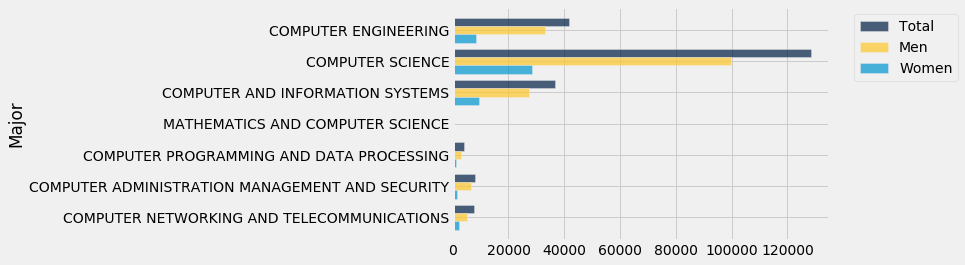

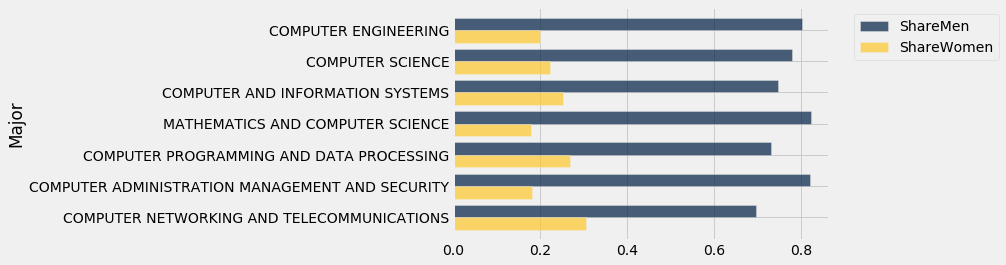

In [8]:
cs_major_data.barh('Major',make_array('Total','Men','Women'))
cs_major_data.barh('Major',make_array('ShareMen','ShareWomen'))

In [9]:
totalMen=sum(cs_major_data.column('Men'))
totalWomen=sum(cs_major_data.column('Women'))
menToWomen=totalMen/totalWomen
print("Men in computer science majors:",totalMen)
print("Women in computer science majors:",totalWomen)
print("The ratio of men to women in computer science majors:",menToWomen)

Men in computer science majors: 175837
Women in computer science majors: 51178
The ratio of men to women in computer science majors: 3.4357927234358514


<p>I sorted majors by earning to see if there was a correlation between wages and men-to-women ratios</p>
<p>A negative correlation could indicate that higher earnings encourage women to enter certain majors</p>
<p>I tested all majors and then only CS majors</p>

All: (0.6009866380163369, 9.468515168317412e-09)
CS: (0.2160699314001842, 0.6416905163887913)


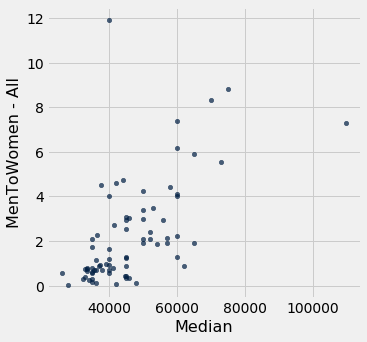

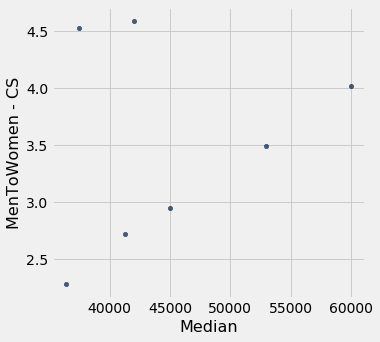

In [10]:
def wage_and_gender_ratio(table,name):
    res=Table().with_columns('Median',table.column('Median'),('MenToWomen - '+name),table.column('Men')/table.column('Women'))
    res.scatter('Median')
    x=res.column('Median')
    y=res.column('MenToWomen - '+name)
    print(name+": "+str(pearsonr(x,y)))
    return res.relabeled(('MenToWomen - '+name),'MenToWomen')

all_wage_and_gender_ratio=wage_and_gender_ratio(major_data,'All')

cs_wage_and_gender_ratio=wage_and_gender_ratio(cs_major_data,'CS')

<p>In both charts, there is a positive correlation between wages and men-to-women ratios, indicating that lower-earning majors tend to have more women and higher-earning majors tend to have more men</p>

<p>To compare Computer Science majors to other industries, I ran the same test for biology major.</p>

Biology: (-0.3074562015266604, 0.692543798473339)


"\nfor major_category in major_category_list:\n    category_major_data=major_data.where(major_data.column('Major_category')==major_category)\n    category_wage_and_gender_ratio=wage_and_gender_ratio(category_major_data,major_category)\n    "

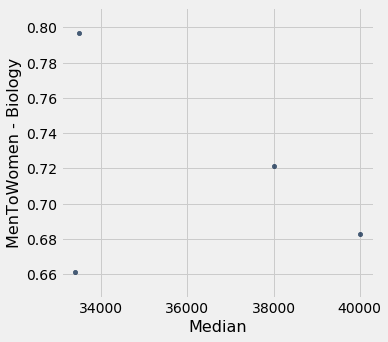

In [11]:
bio_major_data=major_data.where('Major',are.containing("BIOLOGY"))
bio_wage_and_gender_ratio=wage_and_gender_ratio(bio_major_data,'Biology')
'''
for major_category in major_category_list:
    category_major_data=major_data.where(major_data.column('Major_category')==major_category)
    category_wage_and_gender_ratio=wage_and_gender_ratio(category_major_data,major_category)
    '''

<h1>Education Effectiveness By State</h1>
<p>The 'states_all.csv' file shows math and reading scores from a test conducted on K-12 students by state from 1992 to 2017</p>
<p>The data also provides the revenue and expenditures of every state and the population of students by grade ranges </p>

In [12]:
test_scores_all=Table.read_table('states_all.csv')
test_scores_all

PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1992_ALABAMA,ALABAMA,1992,nan,2.67888e+06,304177,1.65903e+06,715680,2.6538e+06,1.4817e+06,735036,nan,174053,8224,55460,57948,58025,41167,471564,196386,676174,208.328,252.188,207.964,nan
1992_ALASKA,ALASKA,1992,nan,1.04959e+06,106780,720711,222100,972488,498362,350902,nan,37451,2371,10152,9748,8789,6714,79117,30847,112335,nan,nan,nan,258.86
1992_ARIZONA,ARIZONA,1992,nan,3.25808e+06,297888,1.36982e+06,1.59038e+06,3.40158e+06,1.43591e+06,1.00773e+06,nan,609114,2544,53497,55433,49081,37410,437127,175210,614881,215.254,265.366,206.213,262.17
1992_ARKANSAS,ARKANSAS,1992,nan,1.71196e+06,178571,958785,574603,1.74302e+06,964323,483488,nan,145212,808,33511,34632,36011,27651,281338,123113,405259,210.206,256.312,208.634,264.62
1992_CALIFORNIA,CALIFORNIA,1992,nan,2.626e+07,2.07247e+06,1.65465e+07,7.64104e+06,2.71388e+07,1.43589e+07,8.52093e+06,nan,2.04469e+06,59067,431763,418418,363296,270675,3.28603e+06,1.37201e+06,4.71711e+06,208.399,260.892,196.764,nan
1992_COLORADO,COLORADO,1992,nan,3.18517e+06,163253,1.30799e+06,1.71393e+06,3.26483e+06,1.64247e+06,1.03597e+06,nan,364760,7410,47588,50648,45025,34533,394904,160299,562613,221.023,272.398,213.481,266.42
1992_CONNECTICUT,CONNECTICUT,1992,nan,3.8343e+06,143542,1.34254e+06,2.34822e+06,3.72134e+06,2.14804e+06,1.1426e+06,nan,48542,5731,41319,38058,33691,28366,304284,126917,436932,226.798,273.739,222.418,264.714
1992_DELAWARE,DELAWARE,1992,nan,645233,45945,420942,178346,638784,372722,194915,nan,30595,463,8025,8272,8012,6129,67495,28338,96296,217.9,262.869,206.389,261.578
1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,nan,709480,64749,0,644731,742893,329160,316679,nan,47272,4818,6667,5832,5000,3433,47009,18173,70000,192.601,234.925,178.558,265.977
1992_FLORIDA,FLORIDA,1992,nan,1.15063e+07,788420,5.68395e+06,5.03393e+06,1.13056e+07,5.16637e+06,3.41044e+06,nan,1.66783e+06,31464,161701,164416,142372,100835,1.27668e+06,511557,1.81971e+06,213.69,259.909,204.883,262.119


In [13]:
# cleaning data
test_scores=Table().with_columns('Year',test_scores_all.column('YEAR'),'State',test_scores_all.column('STATE'),
                                 'Revenue',test_scores_all.column('TOTAL_REVENUE'),'Expenditure',test_scores_all.column('TOTAL_EXPENDITURE'),
                                 'Math4',test_scores_all.column('AVG_MATH_4_SCORE'),'Reading4',test_scores_all.column('AVG_READING_4_SCORE'),
                                 'Math8',test_scores_all.column('AVG_MATH_8_SCORE'),'Reading8',test_scores_all.column('AVG_READING_8_SCORE'))
test_scores

Year,State,Revenue,Expenditure,Math4,Reading4,Math8,Reading8
1992,ALABAMA,2.67888e+06,2.6538e+06,208.328,207.964,252.188,nan
1992,ALASKA,1.04959e+06,972488,nan,nan,nan,258.86
1992,ARIZONA,3.25808e+06,3.40158e+06,215.254,206.213,265.366,262.17
1992,ARKANSAS,1.71196e+06,1.74302e+06,210.206,208.634,256.312,264.62
1992,CALIFORNIA,2.626e+07,2.71388e+07,208.399,196.764,260.892,nan
1992,COLORADO,3.18517e+06,3.26483e+06,221.023,213.481,272.398,266.42
1992,CONNECTICUT,3.8343e+06,3.72134e+06,226.798,222.418,273.739,264.714
1992,DELAWARE,645233,638784,217.9,206.389,262.869,261.578
1992,DISTRICT_OF_COLUMBIA,709480,742893,192.601,178.558,234.925,265.977
1992,FLORIDA,1.15063e+07,1.13056e+07,213.69,204.883,259.909,262.119


<p>Upon graphing an aggregate graph of all states, the correlation between state expenditure and test scores disappeared. This is because of Simpson's Paradox.</p>

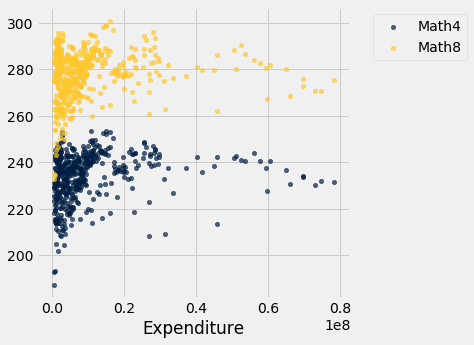

In [14]:
def scatter_test_scores(table):
    table.scatter('Expenditure',make_array('Math4','Math8'))
scatter_test_scores(test_scores)

<p>We can show that this is truly Simpson's paradox by observing each state individually</p>
<p>For example, we displayed data for Arkansas</p>

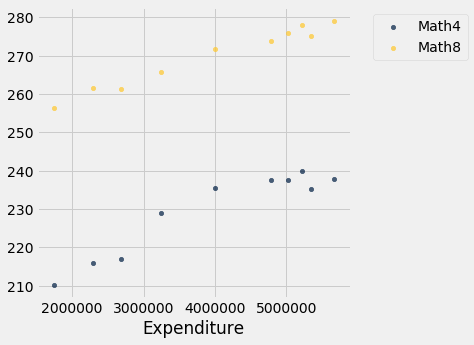

In [15]:
def table_by_state(state):
    return test_scores.where(test_scores.column("State")==state)
scatter_test_scores(table_by_state("ARKANSAS"))

<p>Because there is no efficient way to display all 50 states (51 including District of Columbia) in graph form, we opted to use the correlation coefficient to demonstrate a positive correlation between expenditure and test scores using two histograms for the two math tests</p>

C:\Users\Speed\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
C:\Users\Speed\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
C:\Users\Speed\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
C:\Users\Speed\Anaconda3\lib\site-packages\scipy\stats\stats.py:3033: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
C:\Users\Speed\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Speed\Anaconda3\lib\site-packages\scipy\stats\stats.py:3034: RuntimeWarning: Mean of empty slice.
  my = y.mean()
C:\Users\Speed\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Speed\Ana

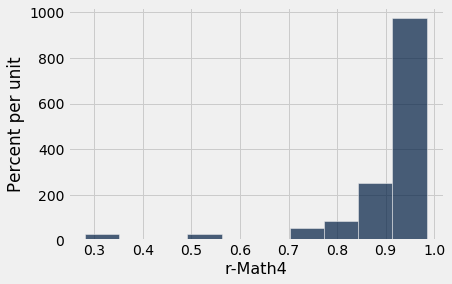

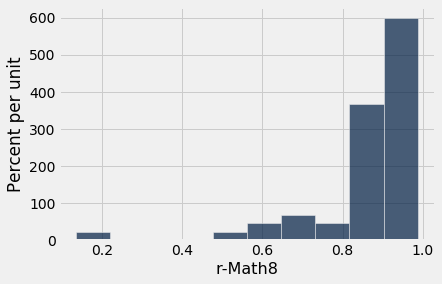

In [16]:
def r_state(state_table):
    clean=state_table.where(state_table.column('Expenditure')>0)
    #Math 4
    clean4=clean.where(clean.column('Math4')>0)
    r_math_4,pval=pearsonr(clean4.column('Expenditure'),clean4.column('Math4'))
    #Math 8
    clean8=clean.where(clean.column('Math8')>0)
    r_math_8,pval=pearsonr(clean8.column('Expenditure'),clean8.column('Math8'))
    return make_array(r_math_4,r_math_8)

states_r_table=Table(make_array('r-Math4','r-Math8'))
for state in np.unique(test_scores.column('State')):
    states_r_table=states_r_table.with_row(r_state(table_by_state(state)))
states_r_table=states_r_table.with_column('State',np.unique(test_scores.column('State')))
states_r_table=states_r_table.where(states_r_table.column('r-Math4')>0)
states_r_table.hist('r-Math4')
states_r_table.hist('r-Math8')

<p>From this histogram, we can see that the majority of states tend to have correlation coefficients that is above 0.8</p>
<p>This means that as states receive larger amounts of revenue (which then leads to higher expenditures) students generally perform better on standardized mathematics tests</p>

<h1>SESTAT Analysis</h1>

In [17]:
#Population and SE by highest education field of study vs employment status
degree_employment=pd.read_csv('SES201301.csv').rename(columns={"Table 1. U.S. scientists and engineers, by degree background and labor force status: 2013":"","Unnamed: 1":"Total","Unnamed: 2":"SE","Unnamed: 3":"Employed","Unnamed: 4":"SE","Unnamed: 5":"S&E","Unnamed: 6":"SE","Unnamed: 7":"S&E-related","Unnamed: 8":"SE","Unnamed: 9":"Non-S&E","Unnamed: 10":"SE","Unnamed: 11":"Unemployed","Unnamed: 12":"SE","Unnamed: 13":"Not in labor force","Unnamed: 14":"SE"}).dropna().reset_index(drop=True)
degree_employment

,,Total,SE,Employed,SE,S&E,SE,S&E-related,SE,Non-S&E,SE,Unemployed,SE,Not in labor force,SE
0,Scientists and engineers,"28,950,000","358,000","23,557,000","336,000","5,749,000","112,000","7,439,000","126,500","10,368,000","180,500","930,000","31,000","4,463,000","71,000"
1,Educated in S&E (holds at least one S&E d...,"21,121,000","242,000","16,841,000","225,000","4,718,000","88,500","3,146,000","59,000","8,977,000","144,000","774,000","27,000","3,505,000","60,000"
2,Highest degree in S&E field,"15,811,000","199,500","12,446,000","183,500","4,341,000","80,500","1,760,000","39,000","6,345,000","123,500","628,000","25,000","2,737,000","53,000"
3,Highest degree in S&E-related field,"1,639,000","39,500","1,416,000","37,500","90,000","6,000","1,118,000","35,500","207,000","12,000","41,000","6,500","183,000","13,500"
4,Highest degree in non-S&E field,"3,670,000","65,000","2,979,000","59,000","287,000","14,000","267,000","15,500","2,425,000","52,500","106,000","8,500","585,000","24,000"
5,No S&E degree but holds at least one S&E-...,"5,852,000","110,500","4,738,000","100,500","245,000","12,500","3,101,000","67,000","1,391,000","55,500","156,000","13,500","958,000","33,500"
6,Highest degree in S&E-related field,"5,354,000","101,500","4,364,000","95,500","229,000","12,000","2,991,000","66,000","1,144,000","51,500","137,000","12,000","853,000","31,000"
7,Highest degree in non-S&E field,"497,000","24,500","374,000","19,500","16,000","3,000","110,000","8,500","248,000","15,500","18,000","4,500","105,000","11,500"
8,Non-S&E degree only,"1,978,000","74,500","1,978,000","74,500","786,000","36,000","1,192,000","59,000",ne,ne,ne,ne,ne,ne


In [18]:
#highest degree field vs occupation area
degree_occupation=pd.read_csv('SES201303_1.csv').drop(columns=["Unnamed: 3"]).rename(columns={"Table 3-1. Broad occupation category of employed U.S. scientists and engineers at all degree levels, by field of highest degree: 2013":"","Unnamed: 1":"Total","Unnamed: 2":"SE","Unnamed: 4":"Life Scientists","Unnamed: 5":"SE","Unnamed: 6":"Computer and Math Scientists","Unnamed: 7":"SE","Unnamed: 8":"Physical Scientists","Unnamed: 9":"SE","Unnamed: 10":"Social Scientists","Unnamed: 11":"SE","Unnamed: 12":"Engineering","Unnamed: 13":"SE","Unnamed: 14":"Health Occupations","Unnamed: 15":"SE","Unnamed: 16":"S&E Managers","Unnamed: 17":"SE","Unnamed: 18":"S&E Pre-college Teachers","Unnamed: 19":"SE","Unnamed: 20":"S&E technicians and technologists","Unnamed: 21":"SE","Unnamed: 22":"Other S&E-related Occupations","Unnamed: 23":"SE","Unnamed: 24":"Non-S&E Occupations","Unnamed: 25":"SE"}).dropna().reset_index(drop=True)
degree_occupation

,,Total,SE,Life Scientists,SE,Computer and Math Scientists,SE,Physical Scientists,SE,Social Scientists,...,S&E Managers,SE,S&E Pre-college Teachers,SE,S&E technicians and technologists,SE,Other S&E-related Occupations,SE,Non-S&E Occupations,SE
0,All fields,"23,557,000","336,000",2.7,0.15,11.2,0.25,1.4,0.05,2.5,...,3.8,0.15,4.1,0.25,3.3,0.15,0.9,0.1,44,0.4
1,S&E field,"12,446,000","183,500",4.2,0.2,14.4,0.3,2.4,0.1,3.3,...,3.6,0.2,1.8,0.15,4,0.2,0.2,0.1,51,0.5
2,Science,"9,587,000","155,500",5.2,0.25,14.4,0.35,2.8,0.1,4.2,...,2.4,0.15,2.1,0.15,3.2,0.2,0.3,0.1,58,0.55
3,Biological/ agricultural/ envir...,"1,896,000","43,500",23,0.9,3.4,0.35,2.4,0.2,0.6,...,2.3,0.3,3,0.35,5,0.45,S,S,44.4,1.25
4,Agricultural/ food sciences,"301,000","21,000",17.3,2.4,2.3,0.8,1.3,0.35,*,...,0.7,0.2,2,0.65,3.3,0.85,D,D,68.1,2.7
5,Biological sciences,"1,427,000","35,000",25.2,0.95,3.2,0.4,2.1,0.2,0.4,...,2.5,0.4,3.4,0.45,5.3,0.55,D,D,38.8,1.4
6,Environmental life sciences,"168,000","10,000",15.5,2.15,6.5,1.85,7.1,1,3.6,...,2.4,0.8,1.2,0.45,4.8,1.45,S,S,50,3.2
7,Computer/ mathematical sciences,"2,197,000","46,500",0.2,0.05,51,1.05,0.2,0.1,0.3,...,4.5,0.45,3.2,0.35,5.9,0.5,0.8,0.25,30.5,1
8,Computer/ information scie...,"1,623,000","41,000",0.1,0.1,58.2,1.2,S,S,0.2,...,5.5,0.55,0.3,0.1,6.5,0.6,0.2,0.1,25.3,1.1
9,Mathematics/ statistics,"574,000","22,000",0.3,0.15,30.7,1.55,0.3,0.2,0.7,...,1.4,0.4,11.5,1.25,4.4,0.85,2.4,0.9,45.5,1.9


In [19]:
#bachelors highest degree
bachelor_occupation=pd.read_csv('SES201303_2.csv').drop(columns=["Unnamed: 3"]).rename(columns={"Table 3-2. Broad occupation category of employed U.S. scientists and engineers with a bachelor's as the highest degree, by field of highest degree: 2013":"","Unnamed: 1":"Total","Unnamed: 2":"SE","Unnamed: 4":"Life Scientists","Unnamed: 5":"SE","Unnamed: 6":"Computer and Math Scientists","Unnamed: 7":"SE","Unnamed: 8":"Physical Scientists","Unnamed: 9":"SE","Unnamed: 10":"Social Scientists","Unnamed: 11":"SE","Unnamed: 12":"Engineering","Unnamed: 13":"SE","Unnamed: 14":"Health Occupations","Unnamed: 15":"SE","Unnamed: 16":"S&E Managers","Unnamed: 17":"SE","Unnamed: 18":"S&E Pre-college Teachers","Unnamed: 19":"SE","Unnamed: 20":"S&E technicians and technologists","Unnamed: 21":"SE","Unnamed: 22":"Other S&E-related Occupations","Unnamed: 23":"SE","Unnamed: 24":"Non-S&E Occupations","Unnamed: 25":"SE"}).dropna().reset_index(drop=True)
bachelor_occupation

,,Total,SE,Life Scientists,SE,Computer and Math Scientists,SE,Physical Scientists,SE,Social Scientists,...,S&E Managers,SE,S&E Pre-college Teachers,SE,S&E technicians and technologists,SE,Other S&E-related Occupations,SE,Non-S&E Occupations,SE
0,Bachelor's,"13,432,000","237,000",2,0.15,13.3,0.4,1,0.1,0.9,...,3.7,0.2,3.1,0.3,4.3,0.2,0.9,0.1,45.3,0.6
1,S&E field,"8,932,000","155,500",2.5,0.2,13.4,0.4,1.3,0.1,1,...,3.4,0.2,1.6,0.15,4.2,0.2,0.2,0.1,57.9,0.6
2,Science,"6,933,000","134,000",3.1,0.25,13.2,0.45,1.6,0.15,1.2,...,2,0.2,1.9,0.2,3.3,0.25,0.3,0.1,65.8,0.65
3,Biological/ agricultural/ envir...,"1,369,000","39,000",13.3,1.05,3.4,0.45,2.4,0.25,0.5,...,1.8,0.4,2.9,0.45,5.2,0.55,S,S,53.6,1.6
4,Agricultural/ food sciences,"241,000","19,000",7.5,1.55,2.1,0.95,1.2,0.4,D,...,S,S,2.1,0.7,3.3,1,D,D,78,2.5
5,Biological sciences,"1,008,000","32,000",14.9,1.25,3.3,0.5,2.2,0.25,0.3,...,2.1,0.5,3.5,0.6,5.8,0.7,D,D,47.3,1.85
6,Environmental life sciences,"120,000","9,500",11.7,2.65,7.5,2.3,6.7,1.25,S,...,2.5,0.95,S,S,4.2,1.65,D,D,57.5,4.2
7,Computer/ mathematical sciences,"1,501,000","37,500",0.1,0.05,47.8,1.3,0.1,0.1,0.3,...,4,0.55,3.3,0.45,6.2,0.65,0.7,0.3,34.4,1.3
8,Computer/ information scie...,"1,111,000","34,000",D,D,57,1.45,S,S,S,...,5,0.7,0.3,0.1,6.8,0.75,S,S,27,1.4
9,Mathematics/ statistics,"390,000","17,500",0.3,0.15,21.5,1.85,S,S,0.8,...,1.3,0.45,11.8,1.6,4.4,1.05,2.3,1.05,55.1,2.5


In [20]:
#master's highest degree
master_occupation=pd.read_csv('SES201303_3.csv').drop(columns=["Unnamed: 3"]).rename(columns={"Table 3-3. Broad occupation category of employed U.S. scientists and engineers with a master's as the highest degree, by field of highest degree: 2013":"","Unnamed: 1":"Total","Unnamed: 2":"SE","Unnamed: 4":"Life Scientists","Unnamed: 5":"SE","Unnamed: 6":"Computer and Math Scientists","Unnamed: 7":"SE","Unnamed: 8":"Physical Scientists","Unnamed: 9":"SE","Unnamed: 10":"Social Scientists","Unnamed: 11":"SE","Unnamed: 12":"Engineering","Unnamed: 13":"SE","Unnamed: 14":"Health Occupations","Unnamed: 15":"SE","Unnamed: 16":"S&E Managers","Unnamed: 17":"SE","Unnamed: 18":"S&E Pre-college Teachers","Unnamed: 19":"SE","Unnamed: 20":"S&E technicians and technologists","Unnamed: 21":"SE","Unnamed: 22":"Other S&E-related Occupations","Unnamed: 23":"SE","Unnamed: 24":"Non-S&E Occupations","Unnamed: 25":"SE"}).dropna().reset_index(drop=True)
master_occupation

,,Total,SE,Life Scientists,SE,Computer and Math Scientists,SE,Physical Scientists,SE,Social Scientists,...,S&E Managers,SE,S&E Pre-college Teachers,SE,S&E technicians and technologists,SE,Other S&E-related Occupations,SE,Non-S&E Occupations,SE
0,Master's,"6,882,000","109,500",2.3,0.25,10.8,0.35,1.2,0.1,3.6,...,4,0.25,7.6,0.45,2.6,0.2,1.1,0.15,47.2,0.7
1,S&E field,"2,596,000","47,500",4.4,0.45,19.6,0.6,2.7,0.2,5.8,...,4.5,0.35,2.8,0.3,4.3,0.3,0.4,0.15,38.9,0.9
2,Science,"1,902,000","41,000",5.8,0.55,20.6,0.7,3.3,0.25,7.9,...,3.7,0.4,3.6,0.4,3.4,0.35,0.4,0.15,44.9,1.1
3,Biological/ agricultural/ envir...,"273,000","14,500",34.8,2.75,3.7,0.7,2.6,0.4,0.7,...,2.9,0.7,5.1,0.95,7,1.35,D,D,27.5,2.15
4,Agricultural/ food sciences,"40,000","8,000",52.5,9.3,S,S,*,*,D,...,S,S,D,D,5,2.05,D,D,32.5,7.7
5,Biological sciences,"194,000","10,500",34,2.15,3.6,0.8,1.5,0.4,0.5,...,3.1,0.95,6.7,1.15,7.2,1.7,D,D,24.7,2.4
6,Environmental life sciences,"40,000","4,500",20,4.15,S,S,7.5,1.45,D,...,S,S,S,S,7.5,3.2,D,D,37.5,5.7
7,Computer/ mathematical sciences,"626,000","19,500",0.3,0.15,55.6,1.75,S,S,0.5,...,5.9,0.85,3.4,0.6,5.8,0.85,1,0.4,23.5,1.55
8,Computer/ information scie...,"481,000","17,000",S,S,59.9,1.9,S,S,S,...,7.1,1.05,0.4,0.15,6,0.95,0.2,0.15,21.8,1.65
9,Mathematics/ statistics,"145,000","11,000",*,*,42.1,3.5,D,D,0.7,...,2.1,0.75,13.1,2.3,4.8,1.65,2.8,1.45,28.3,3.8


In [21]:
#doctorate highest degree
doctorate_occupation=pd.read_csv('SES201303_4.csv').drop(columns=["Unnamed: 3"]).rename(columns={"Table 3-4. Broad occupation category of employed U.S. scientists and engineers with a doctorate as the highest degree, by field of highest degree: 2013":"","Unnamed: 1":"Total","Unnamed: 2":"SE","Unnamed: 4":"Life Scientists","Unnamed: 5":"SE","Unnamed: 6":"Computer and Math Scientists","Unnamed: 7":"SE","Unnamed: 8":"Physical Scientists","Unnamed: 9":"SE","Unnamed: 10":"Social Scientists","Unnamed: 11":"SE","Unnamed: 12":"Engineering","Unnamed: 13":"SE","Unnamed: 14":"Health Occupations","Unnamed: 15":"SE","Unnamed: 16":"S&E Managers","Unnamed: 17":"SE","Unnamed: 18":"S&E Pre-college Teachers","Unnamed: 19":"SE","Unnamed: 20":"S&E technicians and technologists","Unnamed: 21":"SE","Unnamed: 22":"Other S&E-related Occupations","Unnamed: 23":"SE","Unnamed: 24":"Non-S&E Occupations","Unnamed: 25":"SE"}).dropna().reset_index(drop=True)
doctorate_occupation

,,Total,SE,Life Scientists,SE,Computer and Math Scientists,SE,Physical Scientists,SE,Social Scientists,...,S&E Managers,SE,S&E Pre-college Teachers,SE,S&E technicians and technologists,SE,Other S&E-related Occupations,SE,Non-S&E Occupations,SE
0,Doctorate,"1,154,000","16,000",17.5,0.4,9.3,0.35,9.3,0.3,15.1,...,3.4,0.25,1.9,0.5,1.1,0.15,0.1,0.05,24.2,0.7
1,S&E field,"873,000","8,000",21.3,0.45,10.5,0.3,11.9,0.35,16.4,...,3.6,0.25,0.7,0.15,1.4,0.2,0.1,0.05,17,0.4
2,Science,"706,000","7,000",25.6,0.5,10.5,0.35,13.7,0.4,20.3,...,3.3,0.25,0.7,0.15,1.1,0.2,0.1,0.05,17.4,0.45
3,Biological/ agricultural/ envir...,"254,000","5,000",63,0.9,2.4,0.3,2.4,0.2,0.8,...,4.3,0.3,0.8,0.15,1.6,0.45,D,D,13,0.55
4,Agricultural/ food sciences,"20,000","1,000",65,2.55,*,*,5,1.25,*,...,5,0.85,D,D,D,D,D,D,20,1.9
5,Biological sciences,"226,000","5,000",63.7,1,2.7,0.35,1.8,0.2,0.4,...,4,0.35,0.9,0.15,1.8,0.5,D,D,12.4,0.6
6,Environmental life sciences,"8,000",500,50,3.25,*,*,12.5,2.05,12.5,...,12.5,1.7,D,D,D,D,D,D,12.5,2.2
7,Computer/ mathematical sciences,"70,000","2,500",1.4,0.7,77.1,1.65,*,*,*,...,2.9,0.45,*,*,1.4,0.3,*,*,11.4,1.4
8,Computer/ information scie...,"30,000","2,000",*,*,76.7,2.95,D,D,*,...,3.3,0.7,D,D,3.3,0.5,D,D,13.3,2.85
9,Mathematics/ statistics,"39,000","1,500",S,S,79.5,1.85,*,*,*,...,2.6,0.65,*,*,*,*,*,*,10.3,1


In [89]:
def np_float(a):
    ret=[]
    for x in a:
        ret.append(locale.atof(x))
    return np.asarray(ret,np.float32)

In [90]:
percentages=doctorate_occupation.iloc[:,1::2]
totals=np_float(doctorate_occupation.iloc[:,[1]].T.to_numpy()[0])
totals

array([1154000.,  873000.,  706000.,  254000.,   20000.,  226000.,
          8000.,   70000.,   30000.,   39000.,  167000.,   80000.,
         20000.,   64000.,    2000.,  216000.,   28000.,   22000.,
        115000.,   30000.,   21000.,  166000.,    6000.,   20000.,
         13000.,   53000.,    5000.,   24000.,   46000.,   89000.,
         70000.,   12000.,    4000.,    2000.,  192000.,   27000.,
         73000.,   21000.,    7000.,   37000.,   28000.], dtype=float32)

In [91]:
#work field vs highest degree held
degree_level_occupation=pd.read_csv('ResearchDataScience/SES201302.csv').drop(columns=["Unnamed: 3","Unnamed: 4","Unnamed: 7","Unnamed: 8","Unnamed: 11","Unnamed: 12","Unnamed: 15","Unnamed: 16","Unnamed: 19","Unnamed: 20"]).rename(columns={"Table 2. U.S. scientists and engineers, by labor force status and level of highest degree: 2013":"","Unnamed: 1":"All Degrees","Unnamed: 2":"SE","Unnamed: 5":"Bachelor","Unnamed: 6":"SE","Unnamed: 9":"Master","Unnamed: 10":"SE","Unnamed: 13":"Doctorate","Unnamed: 14":"SE","Unnamed: 17":"Professional","Unnamed: 18":"SE"}).dropna().drop([16,20,24]).reset_index(drop=True)
degree_level_occupation

,,All Degrees,SE,Bachelor,SE,Master,SE,Doctorate,SE,Professional,SE
0,Scientists and engineers,"28,950,000","358,000","16,650,000","249,500","8,551,000","121,000","1,360,000","18,000","2,390,000","51,500"
1,Employed,"23,557,000","336,000","13,432,000","237,000","6,882,000","109,500","1,154,000","16,000","2,089,000","46,500"
2,Employed in S&E occupation,"5,749,000","112,000","3,288,000","84,000","1,689,000","43,500","708,000","8,500","64,000","6,000"
3,Educated in S&E (holds at least...,"4,718,000","88,500","2,493,000","61,000","1,498,000","40,500","676,000","7,500","52,000","5,500"
4,No S&E degree but holds at leas...,"245,000","12,500","166,000","11,000","56,000","5,000","12,000","2,000","10,000","2,500"
5,Non-S&E degree only,"786,000","36,000","629,000","33,500","135,000","10,000","20,000","3,500","2,000","1,000"
6,Employed in S&E-related occupation,"7,439,000","126,500","4,065,000","88,500","1,945,000","49,500","168,000","10,500","1,262,000","39,500"
7,Educated in S&E (holds at least...,"3,146,000","59,000","1,375,000","38,000","891,000","27,500","109,000","5,000","771,000","29,500"
8,No S&E degree but holds at leas...,"3,101,000","67,000","1,841,000","50,000","734,000","26,500","42,000","6,000","485,000","23,000"
9,Non-S&E degree only,"1,192,000","59,000","849,000","51,500","321,000","25,500","17,000","6,500",S,S
